In [4]:
import sys
sys.path.insert(0, '..')

In [5]:
import findspark
findspark.init()

In [6]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from utils.utilities import read_file,write_output
from utils.distinct_values import get_distinct_values

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder. \
    appName("Data-Exploration"). \
    getOrCreate()
spark.conf.set("spark.debug.maxToStringFields", 100000)
spark.conf.set("spark.sql.debug.maxToStringFields", 100000)

22/08/28 12:03:54 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


## Variables

In [8]:
input_path="/dataset/output/cleaned/"
output_path='/dataset/output/'

### Read data

In [9]:
df=read_file(input_path)

In [10]:
df.printSchema()

root
 |-- job_id: string (nullable = true)
 |-- agency: string (nullable = true)
 |-- posting_type: string (nullable = true)
 |-- no_of_positions: string (nullable = true)
 |-- business_title: string (nullable = true)
 |-- civil_service_title: string (nullable = true)
 |-- title_code_no: string (nullable = true)
 |-- level: string (nullable = true)
 |-- job_category: string (nullable = true)
 |-- full-time/part-time_indicator: string (nullable = true)
 |-- salary_range_from: string (nullable = true)
 |-- salary_range_to: string (nullable = true)
 |-- salary_frequency: string (nullable = true)
 |-- work_location: string (nullable = true)
 |-- division/work_unit: string (nullable = true)
 |-- job_description: string (nullable = true)
 |-- minimum_qual_requirements: string (nullable = true)
 |-- preferred_skills: string (nullable = true)
 |-- additional_information: string (nullable = true)
 |-- to_apply: string (nullable = true)
 |-- hours/shift: string (nullable = true)
 |-- work_locati

# Data Exploration


## Provide a detailed analysis of source data: Column values (eg: Numerical vs character), categorical columns, etc.

In [8]:
df.head()

Row(job_id=229124, agency='DEPT OF HEALTH/MENTAL HYGIENE', posting_type='External', no_of_positions=1, business_title='HIV Program Associate, Bureau of STD Prevention and Control', civil_service_title='SUPERVISING PUBLIC HEALTH ADVI', title_code_no='51193', level='0', job_category='Health', full-time/part-time_indicator='F', salary_range_from=48900.0, salary_range_to=69042.0, salary_frequency='Annual', work_location='42-09 28th Street', division/work_unit='STI Administration', job_description='The Bureau of Sexually Transmitted Disease Control BSTDC has the mission of improving the sexual health of all New Yorkers To achieve this the Bureau provides direct clinical services to people seeking sexual health care and services to sex partners monitors disease trends provides education and training to providers and community groups conducts research and develop policies to improve sexual health and wellness The BSTDC operates 8 STD clinics throughout New York City NYC Primary responsibiliti

### Check Data Type Of Each Column

In [9]:
df.dtypes

[('job_id', 'int'),
 ('agency', 'string'),
 ('posting_type', 'string'),
 ('no_of_positions', 'int'),
 ('business_title', 'string'),
 ('civil_service_title', 'string'),
 ('title_code_no', 'string'),
 ('level', 'string'),
 ('job_category', 'string'),
 ('full-time/part-time_indicator', 'string'),
 ('salary_range_from', 'double'),
 ('salary_range_to', 'double'),
 ('salary_frequency', 'string'),
 ('work_location', 'string'),
 ('division/work_unit', 'string'),
 ('job_description', 'string'),
 ('minimum_qual_requirements', 'string'),
 ('preferred_skills', 'string'),
 ('additional_information', 'string'),
 ('to_apply', 'string'),
 ('hours/shift', 'string'),
 ('work_location_1', 'string'),
 ('recruitment_contact', 'string'),
 ('residency_requirement', 'string'),
 ('posting_date', 'timestamp'),
 ('post_until', 'timestamp'),
 ('posting_updated', 'timestamp'),
 ('process_date', 'timestamp')]

### Get Number Of Records

In [13]:
df.count()

2915

### Summary Statisticss of Data

In [14]:
df.summary().show()

22/08/28 03:11:38 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+-------+-----------------+--------------------+------------+------------------+--------------------+--------------------+-----------------+------------------+--------------------+-----------------------------+------------------+-----------------+----------------+------------------+--------------------+--------------------+-------------------------+--------------------+----------------------+--------------------+--------------------+--------------------+-------------------+---------------------+--------------------+--------------------+--------------------+--------------------+
|summary|           job_id|              agency|posting_type|   no_of_positions|      business_title| civil_service_title|    title_code_no|             level|        job_category|full-time/part-time_indicator| salary_range_from|  sala

### Get Total Count of Each Variable and its Unique Count

In [18]:
dfp=df.toPandas()

In [16]:
print(f"Shape of data is {dfp.shape}")
print("--------------------------------------------------------------------------------------------------")
for feature in dfp.columns:
    print(f"The feature is :: {feature} and Total Count is :::: {dfp[feature].count()} and number of unique categories are :: {dfp[feature].nunique()}")
print("---------------------------------------------------------------------------------------------------")

Shape of data is (2915, 28)
--------------------------------------------------------------------------------------------------
The feature is :: job_id and Total Count is :::: 2915 and number of unique categories are :: 1661
The feature is :: agency and Total Count is :::: 2915 and number of unique categories are :: 52
The feature is :: posting_type and Total Count is :::: 2915 and number of unique categories are :: 2
The feature is :: no_of_positions and Total Count is :::: 2915 and number of unique categories are :: 34
The feature is :: business_title and Total Count is :::: 2915 and number of unique categories are :: 1244
The feature is :: civil_service_title and Total Count is :::: 2915 and number of unique categories are :: 311
The feature is :: title_code_no and Total Count is :::: 2915 and number of unique categories are :: 323
The feature is :: level and Total Count is :::: 2915 and number of unique categories are :: 14
The feature is :: job_category and Total Count is :::: 291

### Get Unique Values Of least Unique Variables

In [17]:
get_distinct_values(df, column = 'posting_type')

['Internal', 'External']

In [18]:
get_distinct_values(df, column = 'level')

['3', 'M4', 'M7', '0', 'M6', 'M1', '4A', 'M5', 'M2', '1', 'M3', '4', '2', '4B']

In [19]:
get_distinct_values(df, column = 'full-time/part-time_indicator')

['F', None, 'P']

## Column Values - Numericals, Categoricals, Strings.

### Numerical columns

In [12]:
numerical_columns=["no_of_positions","salary_range_from","salary_range_to"]

In [13]:
print(f"Numerical Columns are : {numerical_columns}")

Numerical Columns are : ['no_of_positions', 'salary_range_from', 'salary_range_to']


### Categorical columns

In [24]:
categorical_columns=["agency",'posting_type','no_of_positions','level','full-time/part-time_indicator','salary_frequency'
                     ,'residency_requirement','work_location']

In [25]:
print(f"Categorical Columns are : {categorical_columns}")

Categorical Columns are : ['agency', 'posting_type', 'no_of_positions', 'level', 'full-time/part-time_indicator', 'salary_frequency', 'residency_requirement', 'work_location']


### String columns

In [24]:
all_cols=df.columns

char1=[x for x in all_cols if x not in numerical_columns]
char_columns=[x for x in char1 if x not in categorical_columns]

In [25]:
print(f"String Columns are : {char_columns}")

String Columns are : ['job_id', 'business_title', 'civil_service_title', 'title_code_no', 'level', 'job_category', 'full-time/part-time_indicator', 'division/work_unit', 'job_description', 'minimum_qual_requirements', 'preferred_skills', 'additional_information', 'to_apply', 'hours/shift', 'work_location_1', 'recruitment_contact', 'posting_date', 'post_until', 'posting_updated', 'process_date']


In [1]:
import os
import sys
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
pd.pandas.set_option('display.max_columns',None)

In [2]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

<AxesSubplot:>

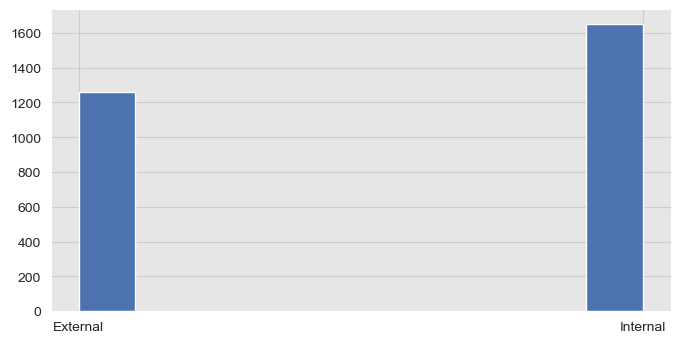

In [20]:
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
dfp['posting_type'].hist(ax=ax)

<AxesSubplot:>

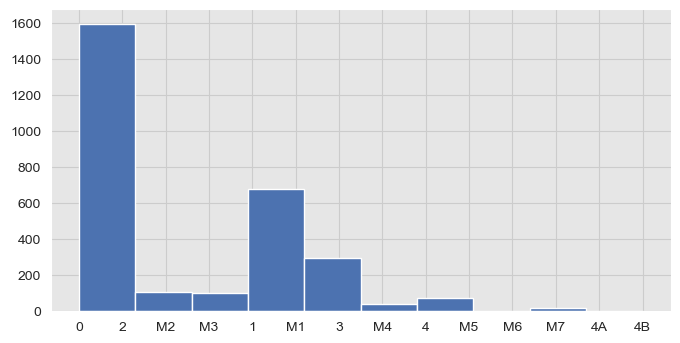

In [23]:
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
dfp['level'].hist(ax=ax)

<AxesSubplot:>

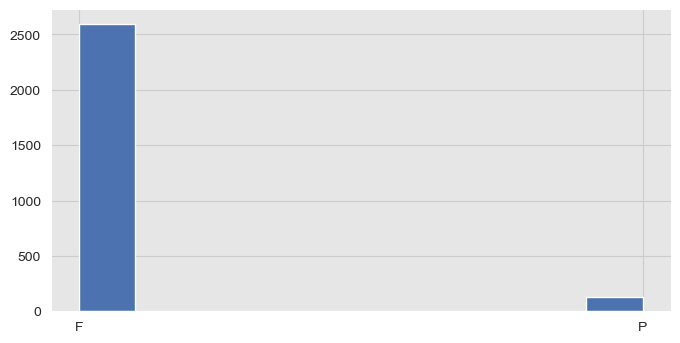

In [27]:
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
dfp['full-time/part-time_indicator'].hist(ax=ax)

<AxesSubplot:>

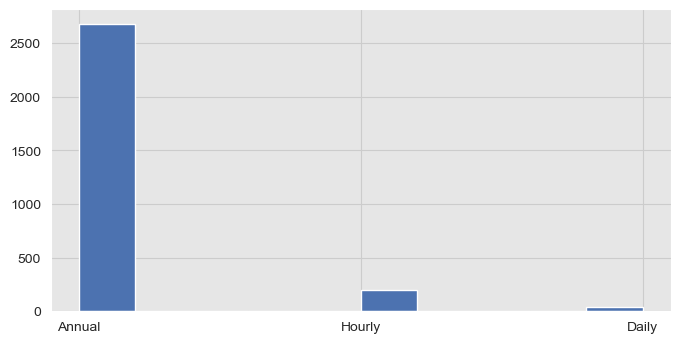

In [28]:
fig=plt.figure(figsize=(8,4))
ax=fig.gca()
dfp['salary_frequency'].hist(ax=ax)

In [29]:
numerical_columns

['no_of_positions', 'salary_range_from', 'salary_range_to']

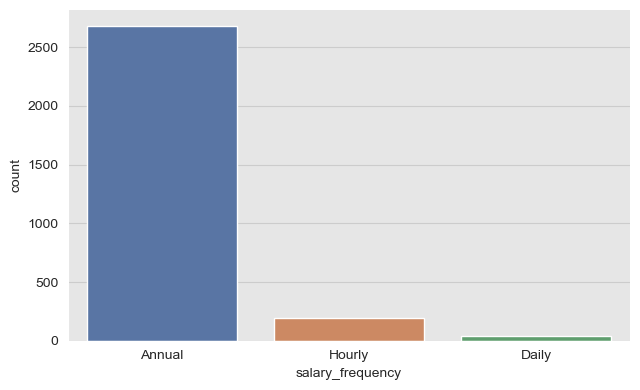

In [32]:
sns.catplot(x="salary_frequency",kind='count', data=dfp,height=4,aspect=6.5/4)

<AxesSubplot:xlabel='salary_frequency'>

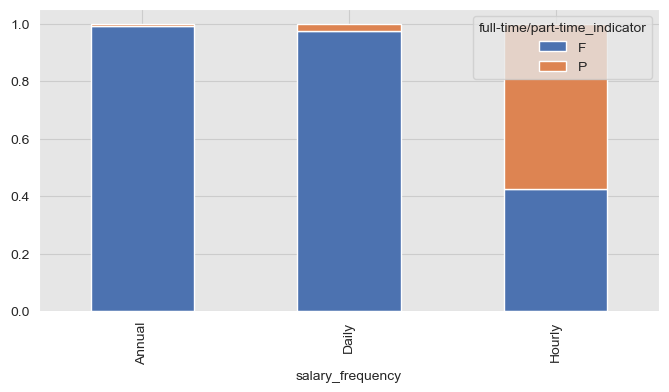

In [35]:
cross_tab=pd.crosstab(index=dfp['salary_frequency'],columns=dfp['full-time/part-time_indicator'],normalize='index')

cross_tab.plot(kind='bar',stacked=True,figsize=(8,4))